This notebook predict the date based on sequential patent number (Valid for german patents)

In [1]:
from pymongo import MongoClient
from matplotlib import pyplot as plt
client = MongoClient("localhost", 29012)
db = client["test-database"]
collection_txt = db["collection-txt2"]
collection_json = db["collection-json"]


In [ ]:
x = []
y = []
for item in collection_txt.find({"Country":"DE"}, {'_id':1, 'ID':1, 'C_Publication Date':1}):
    if 'C_Publication Date' in item and item['C_Publication Date'] is not None:
        x.append(int(item['C_Publication Date'][:4]))
        y.append(int(item['ID'][2:-1]))
for item in collection_json.find({"Country":"DE"}, {'_id':1, 'ID':1, 'C_Publication Date':1}):
    if 'C_Publication Date' in item and item['C_Publication Date'] is not None:
        x.append(int(item['C_Publication Date'][:4]))
        y.append(int(item['ID'][2:-1]))
# Sort y in ascending order and reorder x accordingly
x_sorted_y, y_sorted = zip(*sorted(zip(x, y), key=lambda pair: pair[1]))
x = list(x_sorted_y)
y = list(y_sorted)

In [ ]:
import pandas as pd
x = []
y = []
for item in collection_txt.find({"Country":"DE"}, {'_id':1, 'ID':1, 'C_Publication Date':1}):
    if 'C_Publication Date' in item and item['C_Publication Date'] is not None:
        x.append(pd.to_datetime(item['C_Publication Date']))
        y.append(int(item['ID'][2:-1]))
for item in collection_json.find({"Country":"DE"}, {'_id':1, 'ID':1, 'C_Publication Date':1}):
    if 'C_Publication Date' in item and item['C_Publication Date'] is not None:
        x.append(pd.to_datetime(item['C_Publication Date']))
        y.append(int(item['ID'][2:-1]))
# Sort y in ascending order and reorder x accordingly
x_sorted_y, y_sorted = zip(*sorted(zip(x, y), key=lambda pair: pair[1]))
x = list(x_sorted_y)
y = list(y_sorted)

Preview ID and Date graph

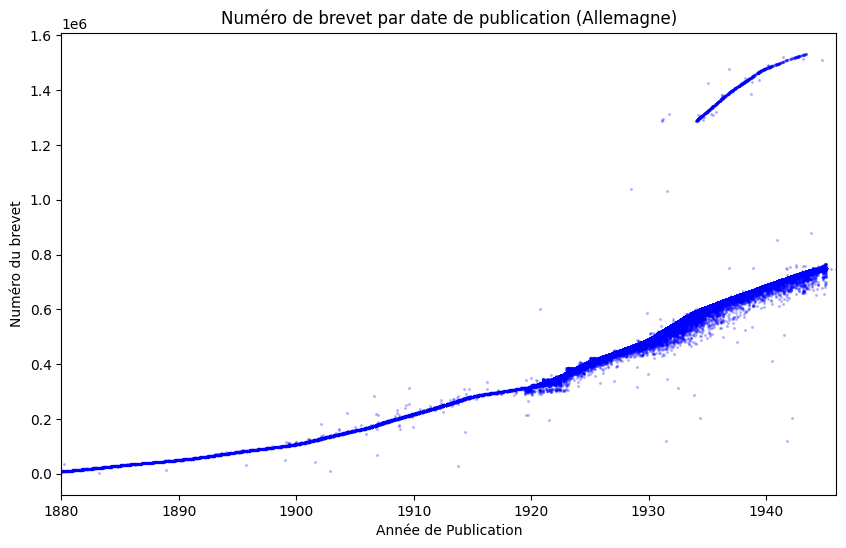

In [269]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=7, alpha=0.2, c='blue', marker='.')
plt.xlabel('Année de Publication')
plt.ylabel('Numéro du brevet')
plt.xlim(pd.to_datetime('1880-01-01'), pd.to_datetime('1945-12-31'))
#plt.xlim(1880, 1945)
plt.title('Numéro de brevet par date de publication (Allemagne)')
plt.show()

In [271]:
# Sort y in ascending order and reorder x accordingly
x_sorted_y, y_sorted = zip(*sorted(zip(x, y), key=lambda pair: pair[1]))
x = list(x_sorted_y)
y = list(y_sorted)

In [272]:
import bisect

def predict(id, x_temp, y_temp):
    idx = bisect.bisect_left(y_temp, id) #locate where it would fit in the sorted list
    size_range = 5
    if idx-size_range > 0 and idx+size_range < len(x) and all(list(x[idx-i] == x[idx] for i in range(-size_range,size_range))): #test the values in both direction for 5 matches
        return x_temp[idx] if idx < len(x_temp) else None
    else:
        return None

def predict_nosafe(id, x_temp, y_temp):
    idx = bisect.bisect_left(y_temp, id) #locate where it would fit in the sorted list   
    return x_temp[idx] if idx < len(x_temp) else None
predict(283546, x_sorted_y, y_sorted)

In [250]:
xr, yr = [], []
xb, yb = [], []
xg, yg = [], []
for i, (x1, y1) in enumerate(zip(x_sorted_y, y_sorted)):
    # Remove element i from x and y for prediction
    x_temp = x_sorted_y[i-100:i] + x_sorted_y[i+1:i+100]
    y_temp = y_sorted[i-100:i] + y_sorted[i+1:i+100]
    pred = predict_nosafe(y1, x_temp, y_temp)
    
    if x1 == pred:
        xb.append(x1)
        yb.append(y1)
    elif pred is None:
        xg.append(x1)
        yg.append(y1)
    else:
        xr.append(x1)
        yr.append(y1)

Check if data is mostly sequential

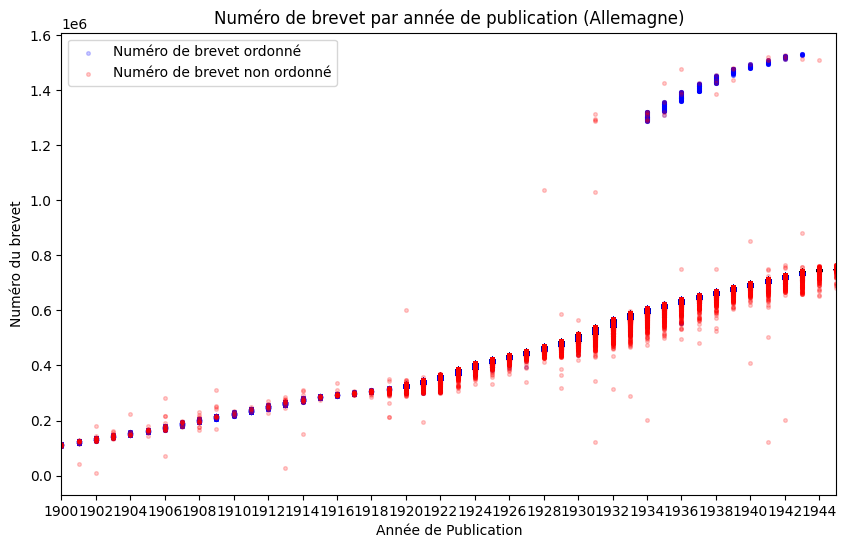

In [274]:
plt.figure(figsize=(10, 6))
#plt.scatter(xg, yg, s=7, alpha=0.2, c='grey', marker='o')
plt.scatter(xb, yb, s=7, alpha=0.2, c='blue', marker='o')
plt.scatter(xr, yr, s=7, alpha=0.2, c='red', marker='o')
plt.xlabel('Année de Publication')
plt.ylabel('Numéro du brevet')
plt.xticks(ticks=range(1900, 1945, 2))
plt.xlim(1900, 1945)
#plt.ylim(100000, 350000)
plt.legend(['Numéro de brevet ordonné', 'Numéro de brevet non ordonné'])
plt.title('Numéro de brevet par année de publication (Allemagne)')
plt.show()

In [275]:
xr, yr = [], []
xb, yb = [], []
xg, yg = [], []
for i, (x1, y1) in enumerate(zip(x_sorted_y, y_sorted)):
    # Remove element i from x and y for prediction
    x_temp = x_sorted_y[i-100:i] + x_sorted_y[i+1:i+100]
    y_temp = y_sorted[i-100:i] + y_sorted[i+1:i+100]
    pred = predict(y1, x_temp, y_temp)
    if x1 == pred:
        xb.append(x1)
        yb.append(y1)
    elif pred is None:
        xg.append(x1)
        yg.append(y1)
    else:
        xr.append(x1)
        yr.append(y1)

Check prediction

422693 422693 20049 20049 101 101


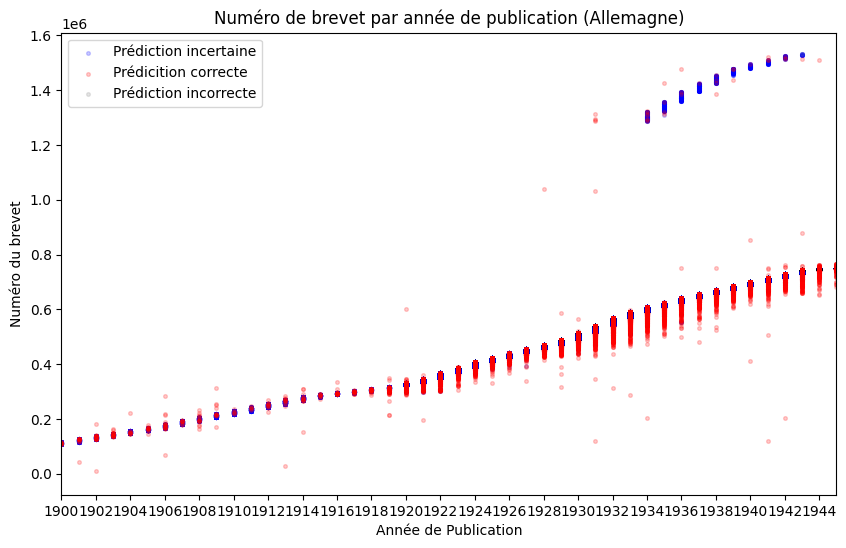

In [276]:
plt.figure(figsize=(10, 6))
plt.scatter(xb, yb, s=7, alpha=0.2, c='blue', marker='o')
plt.scatter(xr, yr, s=7, alpha=0.2, c='red', marker='o')
plt.scatter(xg, yg, s=7, alpha=0.2, c='grey', marker='o')
print(len(xb), len(yb), len(xr), len(yr), len(xg), len(yg))
plt.xlabel('Année de Publication')
plt.ylabel('Numéro du brevet')
plt.xticks(ticks=range(1900, 1945, 2))
plt.xlim(1900, 1945)
#plt.ylim(100000, 350000)
plt.legend(['Prédiction incertaine', 'Prédicition correcte', 'Prédiction incorrecte'])
plt.title('Numéro de brevet par année de publication (Allemagne)')
plt.show()

In [ ]:
print(len(xb)/(len(xb)+len(xr))) # Check accuracy of the prediction


0.9547162907517245


With Applicantion Dates, we expect poor performance with this

In [51]:
import bisect
class Predictor:
    def __init__(self, collection_txt, collection_json, query):
        self.collection_txt = collection_txt
        self.collection_json = collection_json
        self.x = []
        self.y = []
        self.size_range = 5
        self.load_data(query)

    def load_data(self, query):
        x = []
        y = []
        for item in collection_txt.find({"Country":"DE"}, {'_id':1, 'ID':1, query:1}):
            if query in item and item[query] is not None:
                x.append(int(item[query][:4]))
                y.append(int(item['ID'][2:-1]))
        for item in collection_json.find({"Country":"DE"}, {'_id':1, 'ID':1, query:1}):
            if query in item and item[query] is not None:
                x.append(int(item[query][:4]))
                y.append(int(item['ID'][2:-1]))
        x_sorted_y, y_sorted = zip(*sorted(zip(x, y), key=lambda pair: pair[1]))
        self.x = list(x_sorted_y)
        self.y = list(y_sorted)

    def predict(self, id_value):
        idx = bisect.bisect_left(self.y, id_value) #locate where it would fit in the sorted list
        if idx-self.size_range > 0 and idx+self.size_range < len(x) and all(list(x[idx-i] == self.x[idx] for i in range(-self.size_range,self.size_range))): #test the values in both direction for 5 matches
            return self.x[idx] if idx < len(self.x) else None
        else:
            return None
        
    def predict_sample(self, id_value): #This is for validation purpose, we delete the value from the list before prediction
        true_idx = bisect.bisect_left(self.y, id_value)
        x_temp = self.x[true_idx-100:true_idx] + self.x[true_idx+1:true_idx+100]
        y_temp = self.y[true_idx-100:true_idx] + self.y[true_idx+1:true_idx+100]
        idx = bisect.bisect_left(y_temp, id_value)
        return x_temp[idx] if idx < len(x_temp) else None

In [60]:
mypred2 = Predictor(collection_txt, collection_json, 'C_Publication Date')
mypred1 = Predictor(collection_txt, collection_json, 'C_Application Date')

In [9]:
from pymongo import MongoClient
from matplotlib import pyplot as plt
client = MongoClient("localhost", 29012)
db = client["test-database"]
collection_txt = db["collection-txt2"]
collection_json = db["collection-json"]


In [ ]:
import pandas as pd
x = []
y = []
for item in collection_txt.find({"Country":"DE"}, {'_id':1, 'ID':1, 'C_Application Date':1}):
    if 'C_Application Date' in item and item['C_Application Date'] is not None:
        x.append(pd.to_datetime(item['C_Application Date']))
        y.append(int(item['ID'][2:-1]))
for item in collection_json.find({"Country":"DE"}, {'_id':1, 'ID':1, 'C_Application Date':1}):
    if 'C_Application Date' in item and item['C_Application Date'] is not None:
        x.append(pd.to_datetime(item['C_Application Date']))
        y.append(int(item['ID'][2:-1]))
# Sort y in ascending order and reorder x accordingly
x_sorted_y, y_sorted = zip(*sorted(zip(x, y), key=lambda pair: pair[1]))
x = list(x_sorted_y)
y = list(y_sorted)

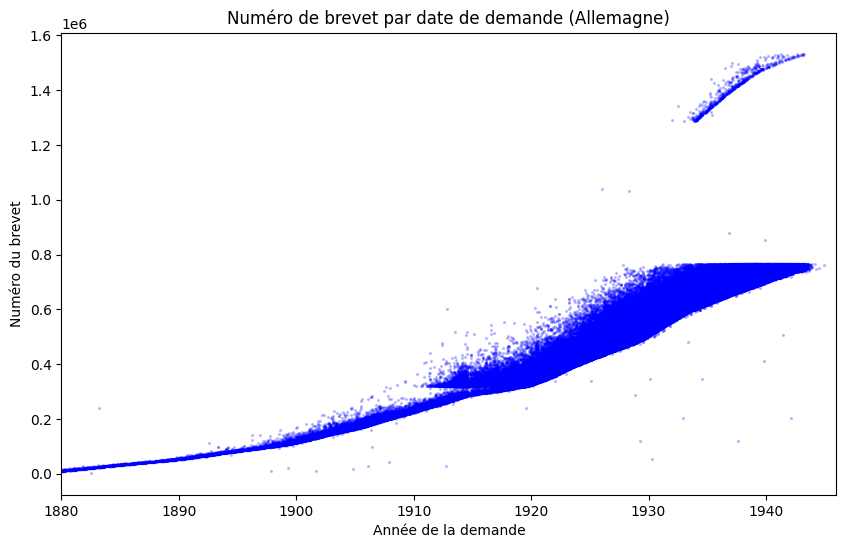

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=7, alpha=0.2, c='blue', marker='.')
plt.xlabel("Année de la demande")
plt.ylabel('Numéro du brevet')
plt.xlim(pd.to_datetime('1880-01-01'), pd.to_datetime('1945-12-31'))
#plt.xlim(1880, 1945)
plt.title('Numéro de brevet par date de demande (Allemagne)')
plt.show()

In [45]:
id = 16939
print(mypred1.x[id], mypred1.y[id])
print(mypred1.predict(mypred1.y[id]))
print(mypred1.predict_sample(mypred1.y[id]))

1913 319430
None
1915


In [62]:
xr, yr = [], []
xb, yb = [], []
xg, yg = [], []
for i, (x1, y1) in enumerate(zip(mypred1.x, mypred1.y)):
    pred = mypred1.predict_sample(y1)
    #print(f"Predicting {i} {x1} {y1} -> {pred}")
    if x1 == pred:
        xb.append(x1)
        yb.append(y1)
    elif pred is None:
        xg.append(x1)
        yg.append(y1)
    else:
        xr.append(x1)
        yr.append(y1)

102939 102939 259479 259479 1 1


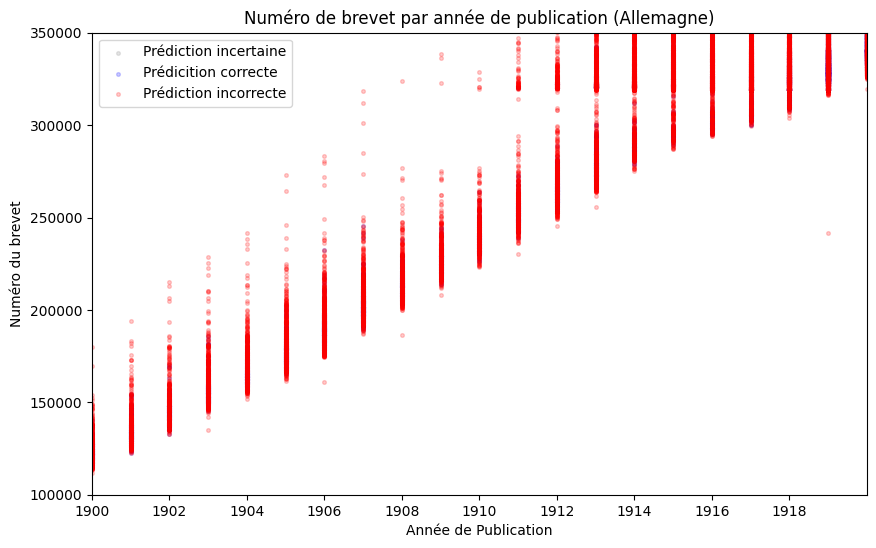

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(xg, yg, s=7, alpha=0.2, c='grey', marker='o')
plt.scatter(xb, yb, s=7, alpha=0.2, c='blue', marker='o')
plt.scatter(xr, yr, s=7, alpha=0.2, c='red', marker='o')
print(len(xb), len(yb), len(xr), len(yr), len(xg), len(yg))
plt.xlabel('Année de Publication')
plt.ylabel('Numéro du brevet')
plt.xticks(ticks=range(1900, 1920, 2))
plt.xlim(1900, 1920)
plt.ylim(100000, 350000)
plt.legend(['Prédiction incertaine', 'Prédicition correcte', 'Prédiction incorrecte'])
plt.title('Numéro de brevet par année de publication (Allemagne)')
plt.show()

In [ ]:
print(len(xb)/(len(xb)+len(xr))) #Indeed the prediction is bad


0.2840339056007152
